<a href="https://colab.research.google.com/github/JinLeeGG/Python_CodingTest/blob/main/(Round2-Day09)%20Problem%20Solving/Problem_Solving.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 1

https://school.programmers.co.kr/learn/courses/30/lessons/181846
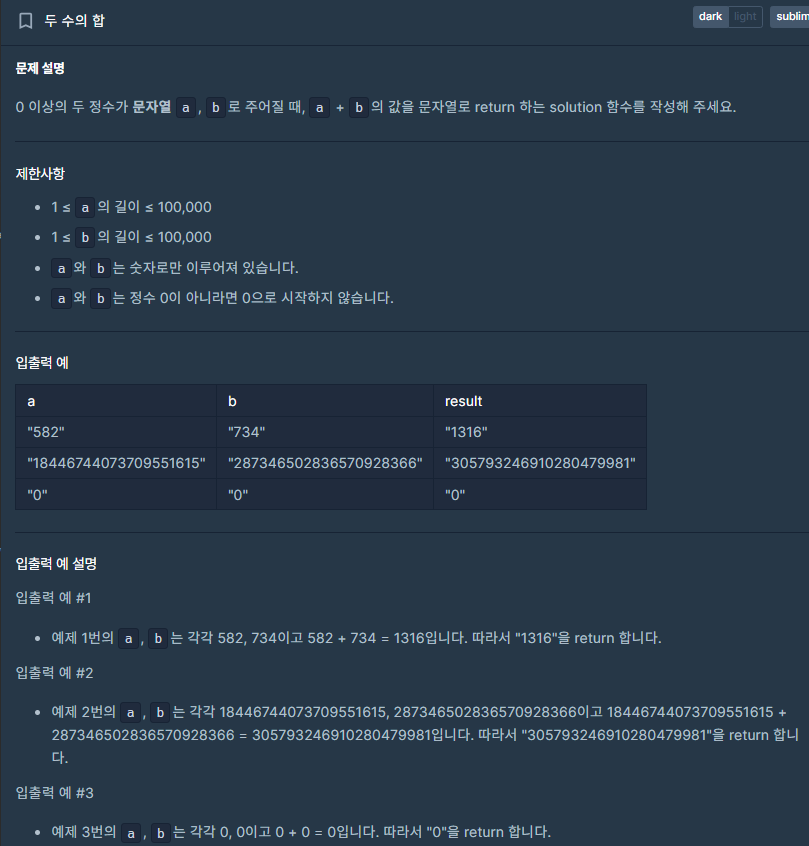

In [1]:
def solution(a, b):
    return str(int(a) + int(b))

In [4]:
print(solution("582", "734"))

1316


# Problem 2
https://school.programmers.co.kr/learn/courses/30/lessons/340205

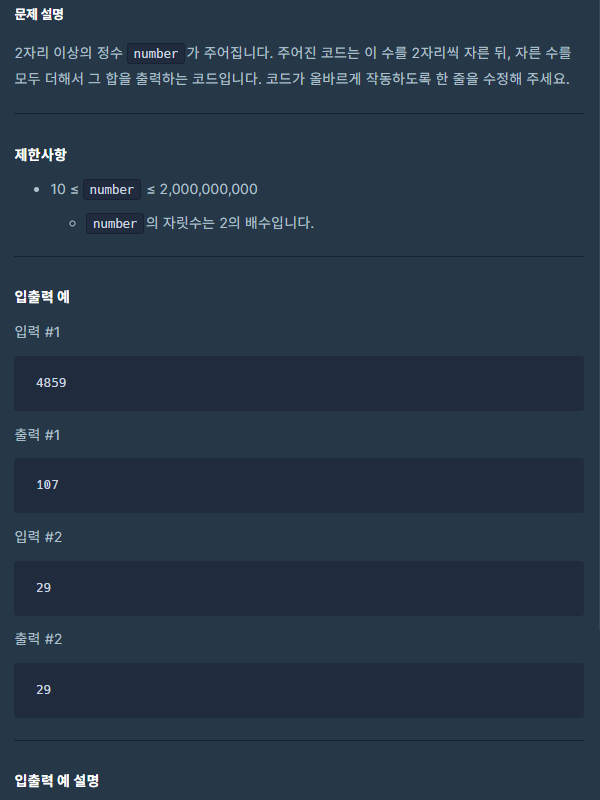

In [ ]:
def solution2(number):
    result = 0
    for i in range(int((len(str(number)) / 2))):
        result += number % 100
        number = number // 100
    print(result)

# Problem 3
https://school.programmers.co.kr/learn/courses/30/lessons/340206

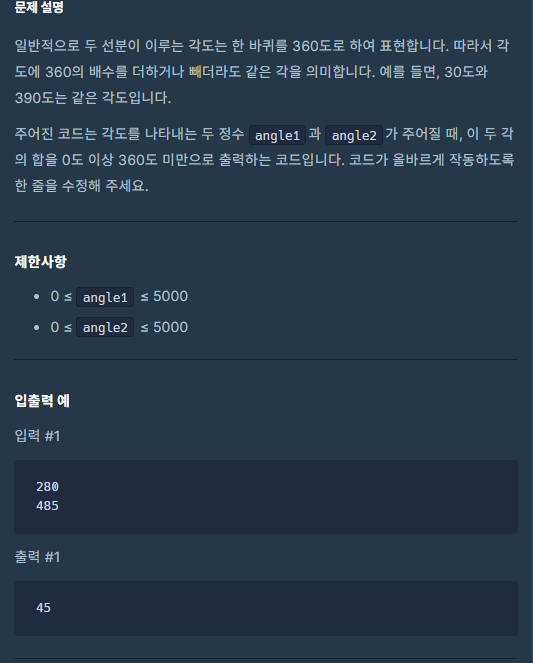

In [ ]:
angle1 = int(input())
angle2 = int(input())

sum_angle = (angle1 + angle2) % 360
print(sum_angle)

280
485
45


# problem 4
https://school.programmers.co.kr/learn/courses/30/lessons/181859

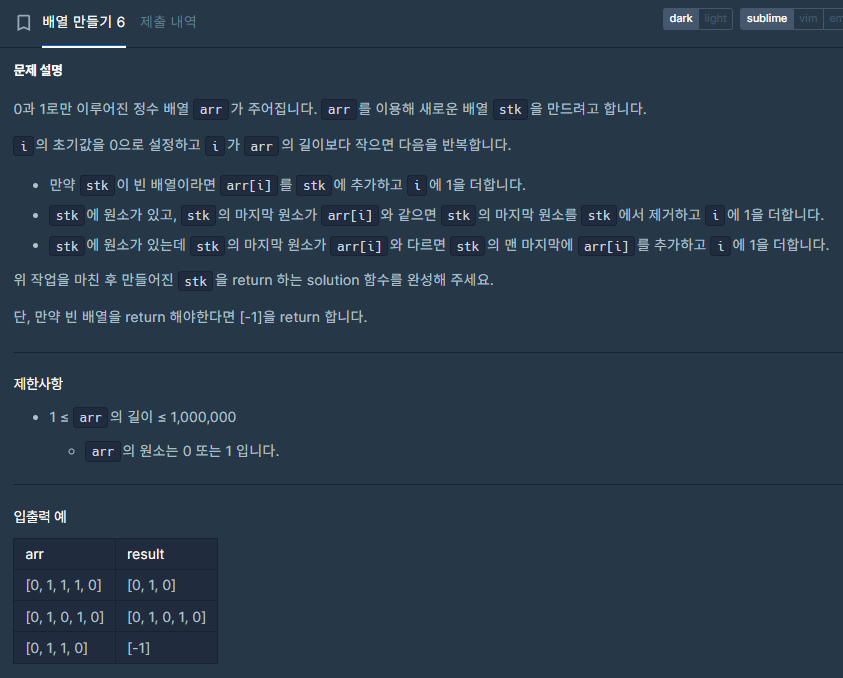

In [ ]:
def solution(arr):
    stk = []
    i = 0
    while i < len(arr):
        if not stk:
            stk.append(arr[i])
            i += 1
        elif stk[-1] == arr[i]:
            stk.pop()
            i += 1
        else:
            stk.append(arr[i])
            i += 1

    # edge case
    if not stk:
        return [-1]
    return stk

In [ ]:
print(solution([0, 1, 1, 1, 0]))
print(solution([0, 1, 0, 1, 0]))
print(solution([0, 1, 1, 0]))

[0, 1, 0]
[0, 1, 0, 1, 0]
[-1]


# Problem 5

https://www.acmicpc.net/problem/19237

1. 상어에는 1 이상 M 이하의 자연수 번호가 붙어 있고 모든 번호는 서로 다르다.

2. 1의 번호를 가진 상어가 가장 세다

3. N * N 크기의 격자 중 M개의 칸에 상어가 한 마리씩 들어 있다. 맨 처음에는 자신의 위치에 냄새를 뿌린다.

4. 1초마다 모든 상어가 동시에 상하좌우로 인접한 칸 중 하나로 이동하고 자신의 냄새를 그 칸에 뿌린다.

5. 냄새는 상어가 k번 이동하면 사라진다.

6. 이동방향은 먼저 아무 냄새가 없는 칸의 방향으로 잡는다.

7. 그런 칸이 없는경우 자신의 냄새가 있는 칸의 방향으로 잡는다. 이때 가능한 칸이 여러개일 경우 특정한 우선순위를 따른다.

8. 우선순위: 상어가 맨 처음에 보고 있는 방향은 입력으로 주어지고, 그 후에는 방금 이동한 방향이 보고 있는 방향이 된다. (각 상어마다 우선순위가 정해져 있다)

9. 이동 후 한 칸에 여러 마리가 있으면 가장 작은 번호를 제외하고 모두 없어진다.

In [ ]:
# N, M, K
N, M, K = map(int, input().split())

# 그래프
graph = []
for i in range(N):
    graph.append(list(map(int, input().split())))


# 상어 초기 방향값
shark_init_dir = list(map(int, input().split()))


# 상어 행동 우선순위
'''
{1: {1: [1, 2, 3, 4], 2: [2, 3, 4, 1], 3: [3, 4, 1, 2], 4: [4, 1, 2, 3]},
2: {1: [1, 2, 3, 4], 2: [2, 3, 4, 1], 3: [3, 4, 1, 2], 4: [4, 1, 2, 3]}}
'''
shark_priority = {}
for shark_num in range(1, M + 1):
    shark_priority[shark_num] = {}
    for initial_dir in range(1, 5):
        priority_list = list(map(int, input().split()))
        shark_priority[shark_num][initial_dir] = priority_list

KeyboardInterrupt: Interrupted by user

In [5]:
# 첫 줄에는 N, M, k가 주어진다. (2 ≤ N ≤ 20, 2 ≤ M ≤ N2, 1 ≤ k ≤ 1,000)
# 그 다음 줄부터 N개의 줄에 걸쳐 격자의 모습이 주어진다. 0은 빈칸이고, 0이 아닌 수 x는 x번 상어가 들어있는 칸을 의미한다.
# 그 다음 줄에는 각 상어의 방향이 차례대로 주어진다. 1, 2, 3, 4는 각각 위, 아래, 왼쪽, 오른쪽을 의미한다.
# 그 다음 줄부터 각 상어의 방향 우선순위가 상어 당 4줄씩 차례대로 주어진다. 각 줄은 4개의 수로 이루어져 있다. 하나의 상어를 나타내는 네 줄 중 첫 번째 줄은 해당 상어가 위를 향할 때의 방향 우선순위, 두 번째 줄은 아래를 향할 때의 우선순위, 세 번째 줄은 왼쪽을 향할 때의 우선순위, 네 번째 줄은 오른쪽을 향할 때의 우선순위이다. 각 우선순위에는 1부터 4까지의 자연수가 한 번씩 나타난다. 가장 먼저 나오는 방향이 최우선이다. 예를 들어, 우선순위가 1 3 2 4라면, 방향의 순서는 위, 왼쪽, 아래, 오른쪽이다.
# 맨 처음에는 각 상어마다 인접한 빈 칸이 존재한다. 따라서 처음부터 이동을 못 하는 경우는 없다.
import sys

def move(grid, alive_sharks, sharks_pos, sharks_dir, sharks_dir_priority, directions):
    max_row = len(grid) - 1
    max_col = len(grid[0]) - 1

    for shark_num in alive_sharks:
        current_row, current_col = sharks_pos[shark_num]
        currnet_dir = sharks_dir[shark_num]
        candidate_pos = []
        candidate_dir = []

        for new_dir in sharks_dir_priority[shark_num][currnet_dir]:
            new_row = current_row + directions[new_dir][0]
            new_col = current_col + directions[new_dir][1]

            if 0 <= new_row <= max_row and 0 <= new_col <= max_col:
                if grid[new_row][new_col][0] == 0:
                    sharks_pos[shark_num] = [new_row, new_col]
                    sharks_dir[shark_num] = new_dir
                    break
                elif grid[new_row][new_col][0] == shark_num:
                    candidate_pos.append([new_row, new_col])
                    candidate_dir.append(new_dir)
        else:
            sharks_pos[shark_num] = candidate_pos[0]
            sharks_dir[shark_num] = candidate_dir[0]

def del_shark(alive_sharks, sharks_pos):
    del_list = []
    for i in range(len(alive_sharks)):
        for j in range(i + 1, len(alive_sharks)):
            if sharks_pos[alive_sharks[j]] == sharks_pos[alive_sharks[i]]:
                del_list.append(j)
    list(set(del_list))
    del_list.sort(reverse=True)
    for i in del_list:
        alive_sharks.pop(i)

def leave_scent(grid, alive_sharks, sharks_pos, K):
    for shark_num in alive_sharks:
        row, col = sharks_pos[shark_num]
        grid[row][col] = [shark_num, K]

def remove_scent(grid, K):
    for row in range(len(grid)):
        for col in range(len(grid[0])):
            grid[row][col][1] -= 1
            if grid[row][col][1] <= 0:
                grid[row][col] = [0, K]

directions = [(), (-1, 0), (1, 0), (0, -1), (0, 1)]

N, M, K = map(int, sys.stdin.readline().rstrip().split())
grid = [[] for _ in range(N)]
sharks_pos = [[] for _ in range(M + 1)]
alive_sharks = [num for num in range(1, M + 1)]

for row in range(N):
    line = list(map(int, sys.stdin.readline().rstrip().split()))
    for col, num in enumerate(line):
        grid[row].append([num, K])
        if num != 0:
            sharks_pos[num] = [row, col]

sharks_dir = [0] + list(map(int, sys.stdin.readline().rstrip().split()))

sharks_dir_priority = [[[]] for _ in range(M + 1)]
for shark_num in range(1, M + 1):
    for _ in range(4):
        direction = list(map(int, sys.stdin.readline().rstrip().split()))
        sharks_dir_priority[shark_num].append(direction)

time = 0
while len(alive_sharks) > 1 and time <= 1000:
    move(grid, alive_sharks, sharks_pos, sharks_dir, sharks_dir_priority, directions)
    del_shark(alive_sharks, sharks_pos)
    remove_scent(grid, K)
    leave_scent(grid, alive_sharks, sharks_pos, K)
    time += 1

print(time if len(alive_sharks) <= 1 and time <= 1000 else -1)

ValueError: not enough values to unpack (expected 3, got 0)

In [7]:
from operator import add, sub
import sys
input = sys.stdin.readline

N, M, K = map(int, input().split())
location = [list(map(int, input().split())) for _ in range(N)]
direction = list(map(int, input().split()))

priority = {}
for i in range(1, M+1):
    priority[i] = [list(map(int, input().split())) for _ in range(4)]

move = [[-1, 0], [1, 0], [0, -1], [0, 1]]

def solution():
    count = 0
    num_shark = M

    shark = [[-1, -1]] * (M+1)
    for i in range(N):
        for j in range(N):
            if location[i][j] != 0:
                shark[location[i][j]] = [i, j]

    smell = [[[0, 0]]*N for _ in range(N)]
    for i in range(1, M+1):
        smell[shark[i][0]][shark[i][1]] = [i, K]

    while True:
        if count > 1000:
            return -1
        if num_shark == 1:
            return count


        for i in range(1, M+1):
            curr_location = shark[i]
            if curr_location == [-1, -1]:
                continue
            curr_direction = direction[i-1]
            curr_priority = priority[i][curr_direction-1]

            poss_locations = []
            for j in range(4):
                poss_location = list(map(add, curr_location, move[curr_priority[j]-1]))
                if 0<=poss_location[0]<N and 0<=poss_location[1]<N:
                    poss_locations.append(poss_location)

            next_location = []
            for poss in poss_locations:
                if smell[poss[0]][poss[1]] == [0, 0]:
                    next_location = poss
                    break
            else:
                for poss in poss_locations:
                    if smell[poss[0]][poss[1]][0] == i:
                        next_location = poss
                        break

            location[curr_location[0]][curr_location[1]] = 0

            if location[poss[0]][poss[1]] == 0:
                location[poss[0]][poss[1]] = i
                shark[i] = [poss[0],poss[1]]
                direction[i-1] = move.index(list(map(sub, next_location, curr_location)))+1
            else:
                num_shark -= 1
                shark[i] = [-1,-1]

        for k in range(N):
            for l in range(N):
                if smell[k][l][1] != 0:
                    smell[k][l][1] -= 1
                    if smell[k][l][1] == 0:
                        smell[k][l][0] = 0

        for i in range(1, M+1):
            if shark[i] == [-1, -1]:
                continue
            smell[shark[i][0]][shark[i][1]] = [i, K]

        count += 1

print(solution())

ValueError: not enough values to unpack (expected 3, got 0)

# Problem 6
https://www.acmicpc.net/problem/2887

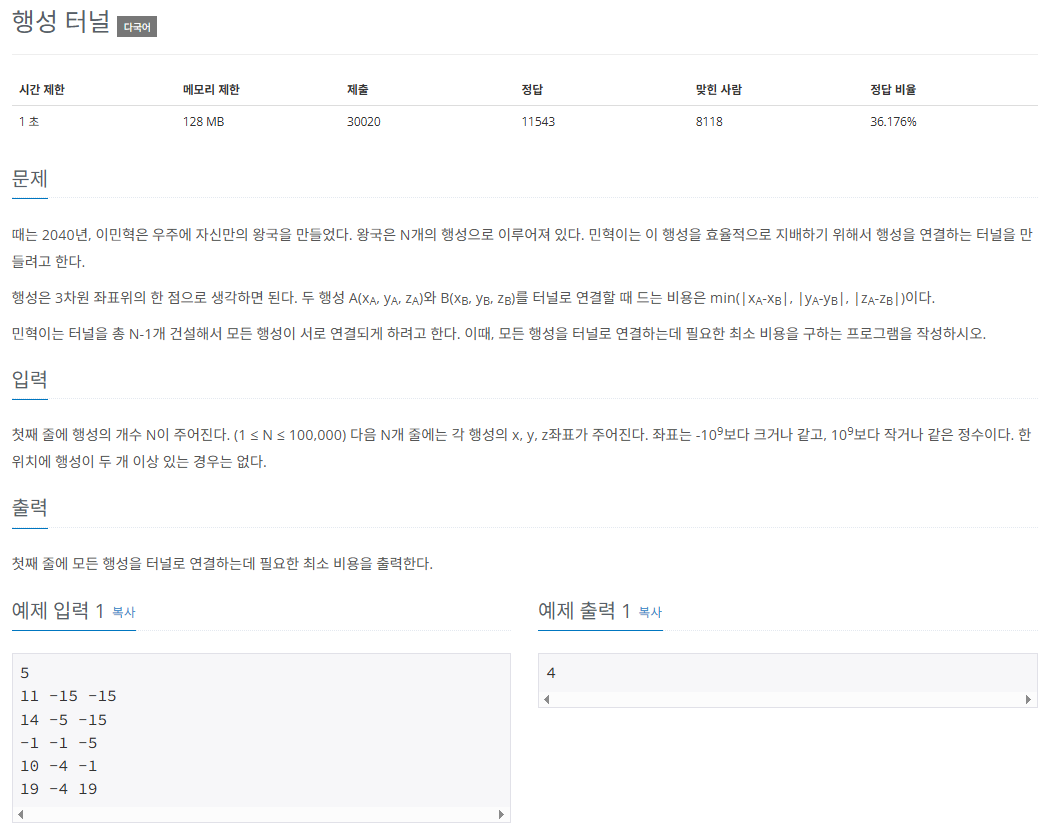

In [ ]:
# https://www.acmicpc.net/problem/2887
# 크루스칼 알고리즘
import sys
input = sys.stdin.readline
N = int(input())
state = [list(map(int,input().split())) + [i] for i in range(N)]

# 유니온 파인드 알고리즘... 이건 글로 설명하기 어려움
connect = [i for i in range(N)]

# 대표 노드를 찾는 함수이며 경로 압축도 같이 함
def find(x):
    if connect[x] != x:
        connect[x] = find(connect[x])
    return connect[x]

# 두 노드가 연결되어 있으면 False
# 두 노드가 연결되어 있지 않으면 연결시키고 True 반환
def union(x, y):
    fx = find(x)
    fy = find(y)
    if fx == fy:
        return False
    else:
        connect[fx] = fy
        return True


def solution(state,N):
    dist = [] # 거리들을 모아놓을 배열 생성

    for i in range(3): # i = 0 이면 x값, i = 1 이면 y값, i = 2 이면 z값을 다룸
        state.sort(key = lambda x : x[i]) # 해당 값에 대해서 정렬
        for j in range(N - 1): # 노드 수는 N개지만 그 사이 간선 수는 N - 1 개
            befor_index = state[j][3] # state는 x,y,z,id 형태기에 id의 인덱스는 3
            after_index = state[j+1][3]
            d = state[j+1][i]-state[j][i]
            # 정렬을 했다보니 j+1이 j보다 큼
            # 거리는 x, y, z 각각의 거리 중 가장 작은 거리를 사용하다 보니
            # 결국 그 값은 x거리, y거리, z거리 중 하나라는 점을 이용해서
            # x, y, z 각각의 거리에 해당하는 간선만 추가할 것이고
            # 멀리 있는 간선은 어짜피 사용되지 않을 것이기에 좌 우만 추가한다

            # 이게 가능한 이유는 일직선상에 있는 노드들에 대해서
            # 좌 우 끼리만 연결을 해도 전체를 모두 연결하는 그래프가 나오며
            # 간단하게 일직선으로만 연결해도 신장트리가 나올 수 있기에
            # 다른 신장트리가 나와도 그 신장트리는 저 일직선에서 시작해서
            # 만드는 최소 신장트리를 이길 수는 없다

            # 여러모로 특이한 설정들이 곂쳐서 나온 상황이며
            # 원래 간선 수는 N(N-1)/2개가 나타나겠지만 이렇게 하면 3(N-1)개로 확 줄어든다
            dist.append((d,befor_index,after_index))
            # 프림과 다르게 여기는 노드 중심이 아니라 간선이 중심이라
            # 거리만 추가하면 된다

    ctn = 0
    answer = 0
    dist.sort()
    # 모든 간선을 모았기에 sort해서 가장 작은 노드부터 나올 수 있게 함


    # 뽑으면서 하는 형태면 while이 더 좋지만 얘는 list로 정의했고
    # 맨 뒤에서 뽑는게 아니라 맨 처음부터 뽑기에 for문으로 충분하다
    # dist를 reverse = True 정렬하고 pop으로 해도 되고
    # queue에 넣고 while문을 해도 되기는 하지만 굳이 싶다
    for dist, idx1, idx2 in dist:
        # 연결된 간선의 수가 N-1개면 멈춰라
        if ctn == N-1:
            break

        # 두 인덱스가 연결되어 있는지 확인하고
        # 연결되어 있으면 False를 반환하기에 더이상의 계산을 하지 않고
        # 연결되어 있지 않으면 True를 반환하기에 거리를 계산하고
        # 연결되어 있는 간선의 수를 1 늘린다
        if union(idx1,idx2):
            answer += dist
            ctn += 1

    return answer

print(solution(state,N))



# 프림 알고리즘
import sys
import heapq
input = sys.stdin.readline

N = int(input())
state = [list(map(int, input().split())) + [i] for i in range(N)]
# 각 노드가 어떤 노드인지 확인하기 위해 고유 번호 느낌으로 인덱스 추가
# 따라서 state의 원소 형태는 x,y,z,id 형태

# 코드는 heapq를 사용하는 dfs처럼 보임
# heapq도 queue라는 이름이지만 FIFO 성격은 없고
# dfs인데 stack의 FILO 성격도 없어서 어느쪽에도 속하는 느낌이 아님
def solution(state,start):
    heap = []  # stack 생성이라 보면 됨

    graph = [[] for _ in range(N)]

    # distance가 특이하게 계산되다 보니 간선을 줄일 수 있음
    for i in range(3): # i = 0 이면 x값, i = 1 이면 y값, i = 2 이면 z값을 다룸
        state.sort(key=lambda x: x[i]) # 해당 값에 대해서 정렬
        for j in range(N - 1): # 노드 수는 N개지만 그 사이 간선 수는 N - 1 개
            before_id = state[j][3]   # state는 x,y,z,id 형태기에 id의 인덱스는 3
            after_id = state[j+1][3]
            dist = state[j+1][i] - state[j][i]
            # 정렬을 했다보니 j+1이 j보다 큼
            # 거리는 x, y, z 각각의 거리 중 가장 작은 거리를 사용하다 보니
            # 결국 그 값은 x거리, y거리, z거리 중 하나라는 점을 이용해서
            # x, y, z 각각의 거리에 해당하는 간선만 추가할 것이고
            # 멀리 있는 간선은 어짜피 사용되지 않을 것이기에 좌 우만 추가한다

            # 이게 가능한 이유는 일직선상에 있는 노드들에 대해서
            # 좌 우 끼리만 연결을 해도 전체를 모두 연결하는 그래프가 나오며
            # 간단하게 일직선으로만 연결해도 신장트리가 나올 수 있기에
            # 다른 신장트리가 나와도 그 신장트리는 저 일직선에서 시작해서
            # 만드는 최소 신장트리를 이길 수는 없다

            # 여러모로 특이한 설정들이 곂쳐서 나온 상황이며
            # 원래 간선 수는 N(N-1)/2개가 나타나겠지만 이렇게 하면 3(N-1)개로 확 줄어든다
            graph[after_id].append((dist, before_id))
            graph[before_id].append((dist, after_id))
            # 그래프에 들어있는 원소의 형태는 (거리, 노드)
            # 뒤에 붙는 애들은 상관없지만 맨 앞의 거리가 들어가게 해야함
            # 그래야 heapq를 사용할 때 맨 앞의 값인 거리를 기준으로
            # 가장 작은 값을 갖는 노드를 꺼내줌


    # 정확하게는 dfs가 아니지만 코드는 비슷함
    for dist, node in graph[start]: # start와 연결된 애들을
        heapq.heappush(heap, (dist, node))
        # 시작하자마자 모두 heapq에 넣어주는데
        # dfs의 경우에는 노드 값이 작은 것 부터 같은 형태이기에
        # 이런 사전 작업이 필요없지만 연결된 애들 중 가장 가까운 노드를
        # 추가해야 하기에 시작부터 연결된 애들을 모두 추가하고 시작해야 한다

    visited = [False] * N
    visited[start] = True

    ctn = 0  # 간선의 수를 새서 멈추게 하기 위해서 필요한 수
    answer = 0  # 거리의 합을 계산할 변수
    while heap and ctn < N - 1:
        dist, node = heapq.heappop(heap)  # heap에서 최소 거리인 애를 뽑아서

        if visited[node]: # 이미 연결되어 있는 노드면 넘어가고
            continue

        visited[node] = True  # 연결 되었다는 체크를 하고
        answer += dist # 거리를 추가하고
        ctn += 1 # 간선의 수를 하나 추가한다

        for adj_dist, adj_node in graph[node]: # 새로 연결된 노드와 연결된 노드들 중에서
            if not visited[adj_node]: # 아직 연결되지 않은 노드들만
                heapq.heappush(heap, (adj_dist, adj_node)) # heap에 추가한다
    # 만약에 ctn < N-1 인데 heap이 먼저 끝날 경우
    # 그래프의 시작점에서 연결되지 않은 노드가 존재하는 것인데
    # 이 문제는 좌 우를 모두 연결했기에 그럴 일이 없어서 처리를 안 했다
    return answer

print(solution(state,0))